# 4.3 Creating Graphs - Pandas

https://pandas.pydata.org/docs/user_guide/visualization.html

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Line plots

In [ ]:
my_series = pd.Series([0, 2, 1, 3, 2, 4, 3, 6, 2])
fig = plt.figure()
my_axes = fig.add_subplot()

my_series.plot(ax=my_axes)

In [ ]:
# More detailed example

from random import randint

# Random month incomes/expenses
income_expense_df = pd.DataFrame({
    "Income" : [randint(0, 1000) for x in range(30)],
    "Expenses" : [randint(0, 1000) for x in range(30)]
})

income_expense_df.head()

In [ ]:
fig = plt.figure()
my_axes = fig.add_subplot()

income_expense_df.plot(ax=my_axes)

In [ ]:
# https://pandas.pydata.org/docs/reference/api/pandas.core.groupby.DataFrameGroupBy.cumsum.html
income_expense_cs = income_expense_df.cumsum()
income_expense_cs.head()

In [ ]:
fig = plt.figure()
cs_ax = fig.add_subplot()

# Customize figure
cs_ax.set_title("Monthly money flow")
cs_ax.set_ylabel("NOK")
cs_ax.set_xlabel("Day of month")
cs_ax.set_xticks([0, 7, 14, 21, 28, 30])

#income_expense_cs.plot(ax=cs_ax)
income_expense_cs.plot(ax=cs_ax, color=["g","r"], marker=".")


<Axes: title={'center': 'Expenses'}, xlabel='Day of month', ylabel='NOK'>

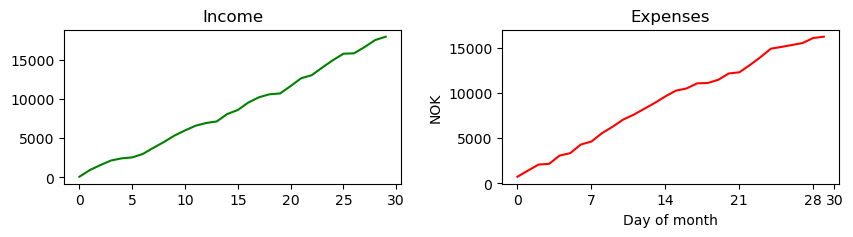

In [36]:
# Seperate into grid
fig = plt.figure(figsize=(10, 2))

income_axes = fig.add_subplot(1, 2, 1)
expense_axes = fig.add_subplot(1, 2, 2)

plt.subplots_adjust(wspace=0.3)
income_axes.set_title("Income")
expense_axes.set_title("Expenses")
for ax in [expense_axes, expense_axes]:
    ax.set_ylabel("NOK")
    ax.set_xlabel("Day of month")
    ax.set_xticks([0, 7, 14, 21, 28, 30])

income_expense_cs["Income"].plot(ax=income_axes, color="g")
income_expense_cs["Expenses"].plot(ax=expense_axes, color = "r")